In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

4422102/4422102 [==============================] - 0s 0us/step


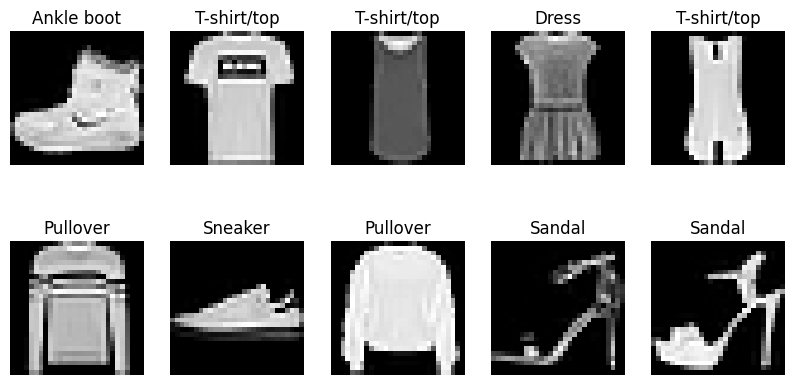

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.dtype, x_train[0].shape

x_train = x_train / 255.0
x_test = x_test / 255.0

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress',
    'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

early_stopping_accuracy = EarlyStopping(monitor='val_accuracy',
                                        patience=10,
                                        restore_best_weights=True,
                                        verbose=1)

optimizer = Adam(learning_rate=0.001)
# optimizer = SGD(learning_rate=0.001)
# optimizer = RMSprop(learning_rate=0.001)

model.compile(optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping_accuracy])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 256)               4

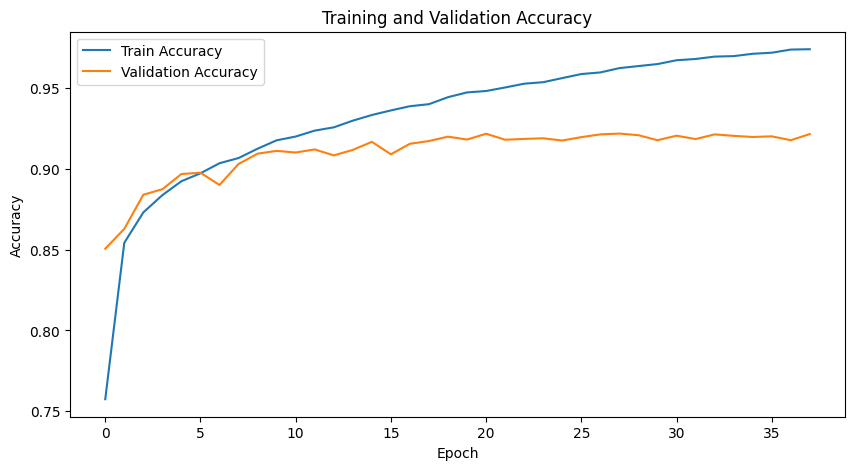

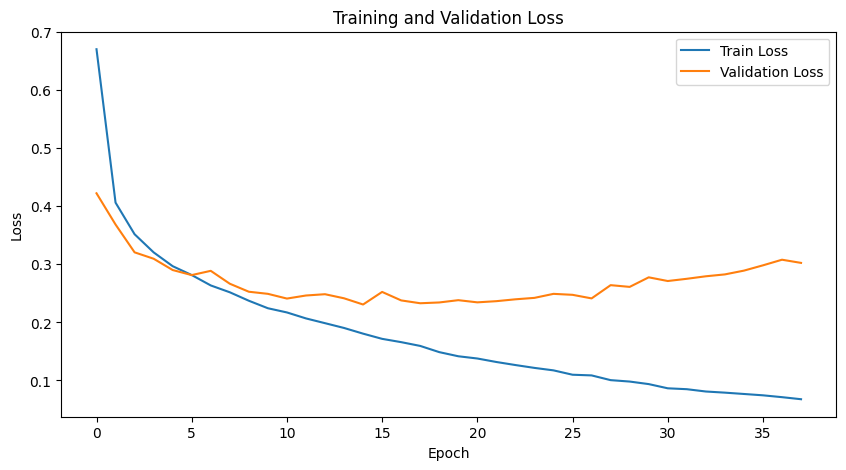

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss:", test_loss)

313/313 - 3s - loss: 0.2642 - accuracy: 0.9217 - 3s/epoch - 9ms/step
Test Accuracy: 92.17%
Test Loss: 0.2641736567020416


## Висновок

- Багатошарова мережа:

  - Точність на тестовому наборі: 89.79%
  - Втрати на тестовому наборі: 0.3698
  - Час навчання на епоху: приблизно 871 мс
  - Середній час на кожен крок: приблизно 3 мс

- Згорткова мережа:

  - Точність на тестовому наборі: 92.17%
  - Втрати на тестовому наборі: 0.2642
  - Час навчання на епоху: приблизно 3 с
  - Середній час на кожен крок: приблизно 9 мс


Згорткова мережа показала кращу точність на тестовому наборі даних Fashion MNIST у порівнянні з багатошаровою мережею.

Згорткові мережі спеціалізовані на обробці зображень і мають здатність виявляти різні ознаки та шаблони в зображеннях завдяки своїм згортковим шарам. Ця спеціалізація допомагає згортковим мережам ефективно впоратися з завданнями класифікації зображень, що містять об'єкти з різними положеннями та текстурами.

Згорткова мережа також має більше параметрів і потребує більше обчислювальних ресурсів, але вона здатна досягти кращих результатів завдяки своїй архітектурі, спеціалізованій на обробці зображень.

Отже, згорткова мережа є більш ефективною для завдань класифікації зображень, і в даному випадку вона досягає вищої точності порівняно з багатошаровою мережею.